**داتاااااااااااااااااا**

##IMPORT

In [ ]:
import os, random, shutil
from pathlib import Path
import cv2
import numpy as np
from PIL import Image

!pip install mtcnn opencv-python

from mtcnn import MTCNN
from google.colab import drive

drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 87.6 MB/s eta 0:00:00
Mounted at /content/drive


##PREPARE DIRECTIONS FOR DATA

In [ ]:
RAW_DIR = Path("/content/drive/MyDrive/final data/Final_data_raw")

EXP_DIR = Path("/content/drive/MyDrive/AI_Project/experiment")
ALIGNED_DIR = EXP_DIR / "aligned_224"
SPLIT_DIR   = EXP_DIR / "split"

TRAIN_DIR = SPLIT_DIR / "train"
VAL_DIR   = SPLIT_DIR / "val"
TEST_DIR  = SPLIT_DIR / "test"

for d in [ALIGNED_DIR, TRAIN_DIR, VAL_DIR, TEST_DIR]:
    d.mkdir(parents=True, exist_ok=True)

##AUGUMENTATION ON ZIAD ABDULLAH (JUST 50 IMAGE BEFOR AND AFTER AUGMENTAION --> 150 TO SOLVE IMAGES SIZE TO PUT ZIAD CLASS IN MODEL TRAINING )

In [ ]:
from PIL import Image, ImageEnhance
import random
import shutil

MY_NAME = "ziad abdullah"
MY_FOLDER = RAW_DIR / MY_NAME

AUG_PER_IMAGE = 2

images = list(MY_FOLDER.glob("*"))

for img_path in images:
    for i in range(AUG_PER_IMAGE):
        img = Image.open(img_path).convert("RGB")

        # 1. random flip
        if random.random() < 0.5:
            img = img.transpose(Image.FLIP_LEFT_RIGHT)

        # 2. random rotation
        if random.random() < 0.5:
            angle = random.randint(-10, 10)
            img = img.rotate(angle)

        # 3. brightness/contrast
        if random.random() < 0.5:
            enhancer = ImageEnhance.Brightness(img)
            img = enhancer.enhance(random.uniform(0.8, 1.3))

        if random.random() < 0.5:
            enhancer = ImageEnhance.Contrast(img)
            img = enhancer.enhance(random.uniform(0.8, 1.3))

        new_name = img_path.stem + f"_aug{i}" + img_path.suffix
        save_path = MY_FOLDER / new_name
        img.save(save_path)

print("🔥 Personal augmentation complete!")


🔥 Personal augmentation complete!


##TEST ON COOL (ZIAD)

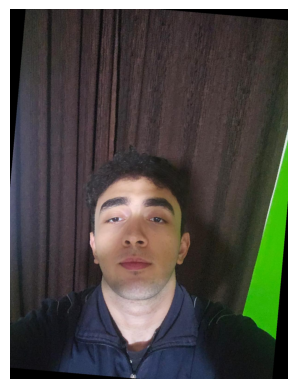

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = MY_FOLDER / "WhatsApp Image 2025-12-19 at 10.28.32 PM(1)_aug1.jpeg"
img_path1 = MY_FOLDER / "WhatsApp Image 2025-12-19 at 10.28.32 PM(1)_aug0.jpeg"

img = Image.open(img_path)
img1 = Image.open(img_path1)

plt.imshow(img)
plt.imshow(img1)

plt.axis('off')
plt.show()


##DO FACE ALIGNED ON ZIAD ABDULLAH

In [ ]:
from pathlib import Path
import cv2
from mtcnn import MTCNN
from PIL import Image

RAW_DIR = Path("/content/drive/MyDrive/final data/Final_data_raw")
ALIGNED_DIR = Path("/content/drive/MyDrive/AI_Project/experiment/aligned_224")

MY_NAME = "ziad abdullah"
MY_FOLDER = RAW_DIR / MY_NAME
OUT_FOLDER = ALIGNED_DIR / MY_NAME

OUT_FOLDER.mkdir(parents=True, exist_ok=True)

IMG_SIZE = 224


detector = MTCNN()


images = list(MY_FOLDER.glob("*"))
for img_path in images:
    img = cv2.imread(str(img_path))
    if img is None:
        continue

    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    faces = detector.detect_faces(img_rgb)
    if len(faces) == 0:
        continue

    face = max(faces, key=lambda f: f['box'][2] * f['box'][3])
    x, y, w, h = face['box']
    x, y = max(0, x), max(0, y)

    face_img = img[y:y+h, x:x+w]
    if face_img.size == 0:
        continue

    face_img = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))

    # حفظ الصورة
    cv2.imwrite(str(OUT_FOLDER / img_path.name), face_img)

print(f"✅ Face alignment done for {MY_NAME}, saved in {OUT_FOLDER}")


✅ Face alignment done for ziad abdullah, saved in /content/drive/MyDrive/AI_Project/experiment/aligned_224/ziad abdullah


##TEST AFTER FACE ALIGNED

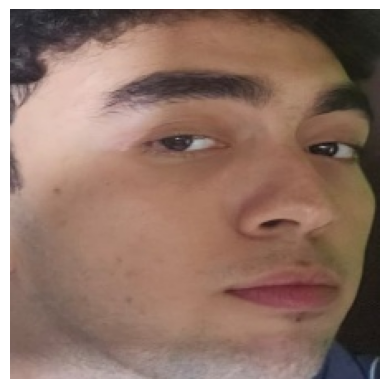

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_dir = "/content/drive/MyDrive/AI_Project/experiment/aligned_224/ziad abdullah"
image_files = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

if image_files:
    img_path = os.path.join(image_dir, image_files[17]) # Take the first image found
else:
    print(f"No image files found in {image_dir}")
    img_path = None # Handle case where no images are found

if img_path:
    img = Image.open(img_path)

    plt.imshow(img)

    plt.axis('off')
    plt.show()
else:
    print("Could not display image as no valid path was found.")


In [ ]:
IMG_SIZE = 224
MAX_CLASSES = 30
MAX_IMAGES_PER_CLASS = 200
MIN_IMAGES_AFTER_ALIGNMENT = 120   # مهم جدًا

##DO FACE ALIGNED ON OTHER IMAGES (WITHOUT ZIAD )

In [ ]:
detector = MTCNN()

persons = sorted([p for p in RAW_DIR.iterdir() if p.is_dir()])
persons = persons[:MAX_CLASSES]

print("Target classes:", len(persons))

for person_folder in persons:
    person_out = ALIGNED_DIR / person_folder.name
    person_out.mkdir(parents=True, exist_ok=True)

    images = list(person_folder.glob("*"))[:MAX_IMAGES_PER_CLASS]

    for img_path in images:
        img = cv2.imread(str(img_path))
        if img is None:
            continue

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(img_rgb)
        if len(faces) == 0:
            continue

        face = max(faces, key=lambda f: f['box'][2] * f['box'][3])
        x, y, w, h = face['box']
        x, y = max(0, x), max(0, y)

        face_img = img[y:y+h, x:x+w]
        if face_img.size == 0:
            continue

        face_img = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))
        cv2.imwrite(str(person_out / img_path.name), face_img)

print("✅ Face alignment finished")

Target classes: 30
✅ Face alignment finished


In [ ]:
valid_persons = []

for person in sorted(ALIGNED_DIR.iterdir()):
    if not person.is_dir():
        continue

    images = list(person.glob("*"))
    if len(images) >= MIN_IMAGES_AFTER_ALIGNMENT:
        valid_persons.append(person)

my_folder = ALIGNED_DIR / "ziad abdullah"
if my_folder.exists() and my_folder not in valid_persons:
    valid_persons.append(my_folder)

print("Valid classes after alignment:", len(valid_persons))


Valid classes after alignment: 31


In [ ]:
valid_persons_names = [p.name for p in valid_persons]
print("Classes in valid_persons:", valid_persons_names)


Classes in valid_persons: ['n000001', 'n000003', 'n000004', 'n000006', 'n000008', 'n000009', 'n000010', 'n000019', 'n000026', 'n000028', 'n000029', 'n000030', 'n000034', 'n000037', 'n000038', 'n000040', 'n000043', 'n000047', 'n000052', 'n000054', 'n000055', 'n000056', 'n000063', 'n000065', 'n000067', 'n000069', 'n000071', 'n000075', 'n000077', 'n000078', 'ziad abdullah']


##TEST


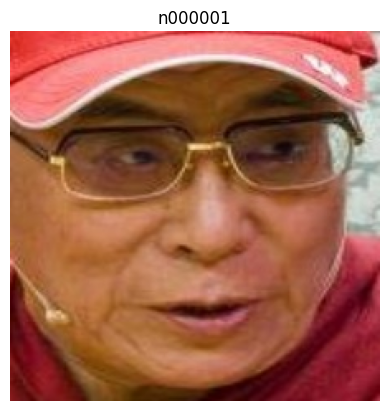

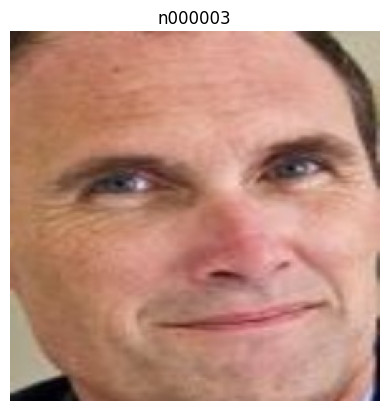

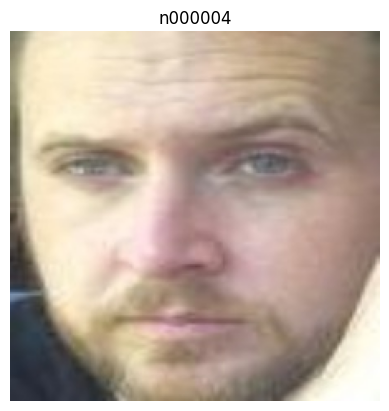

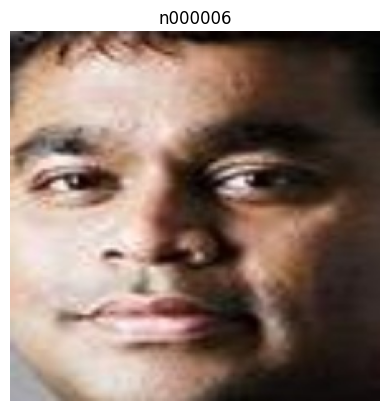

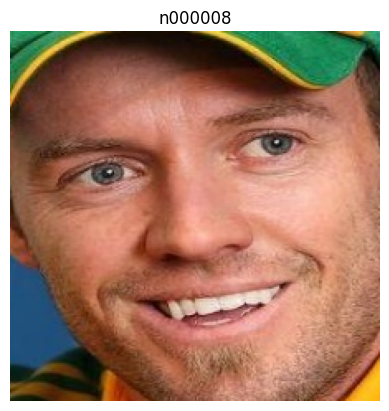

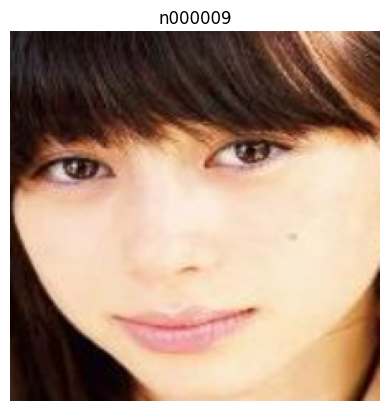

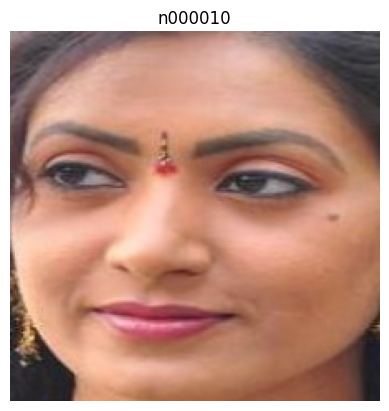

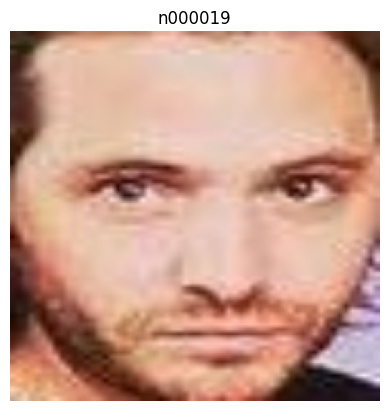

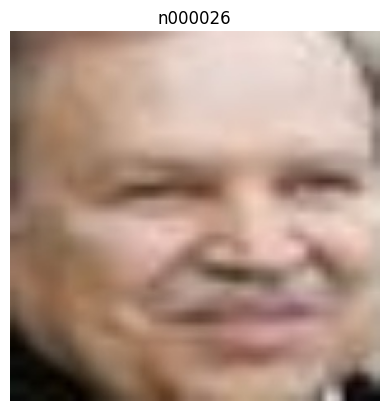

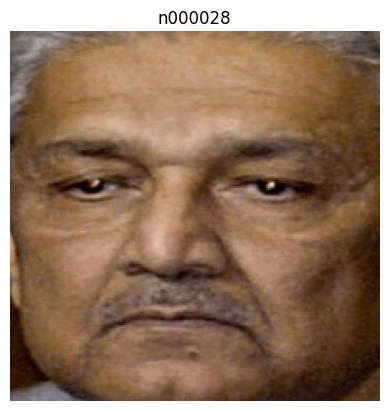

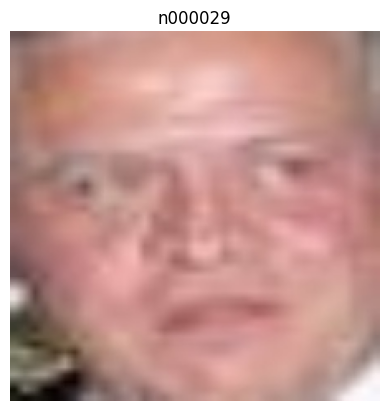

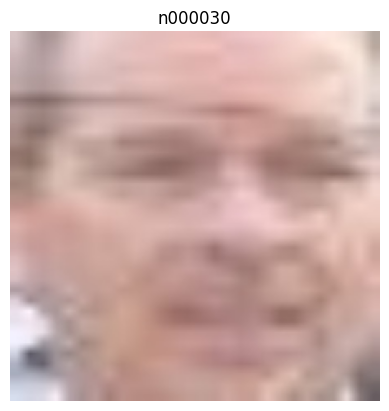

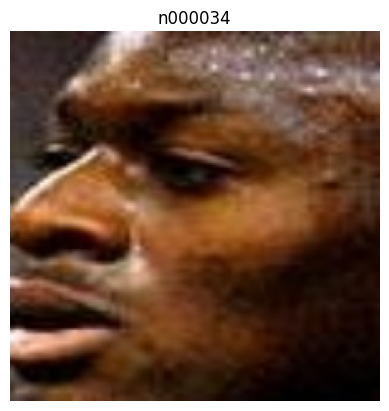

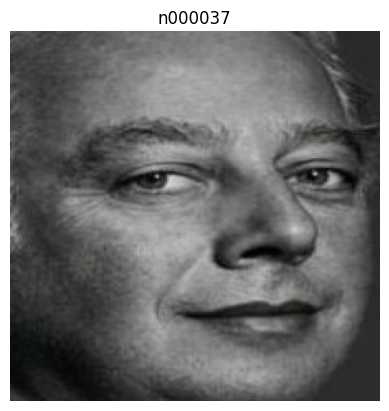

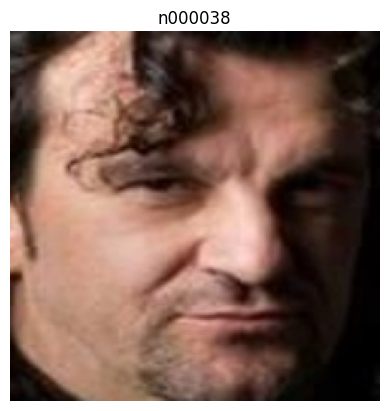

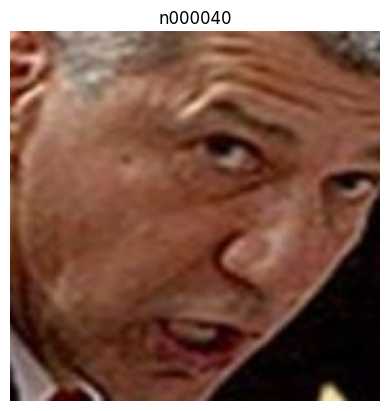

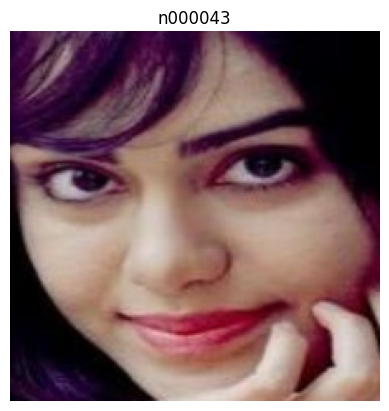

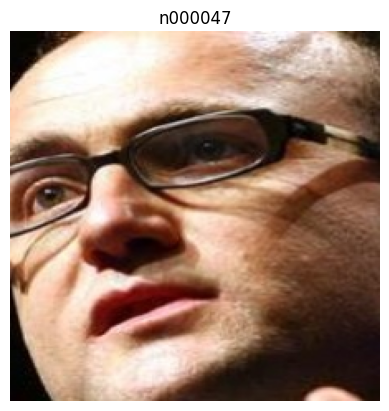

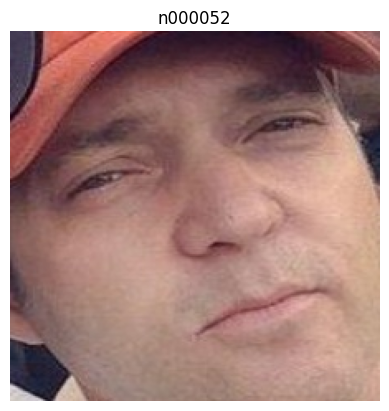

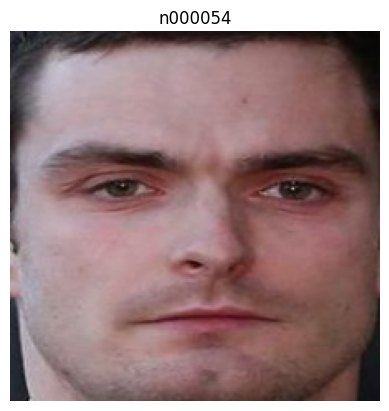

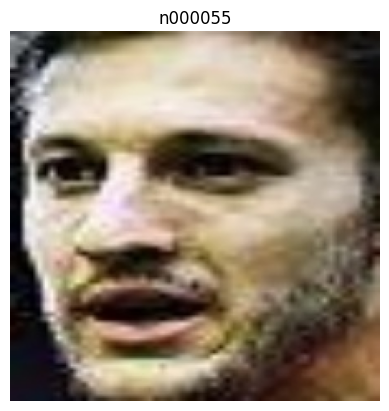

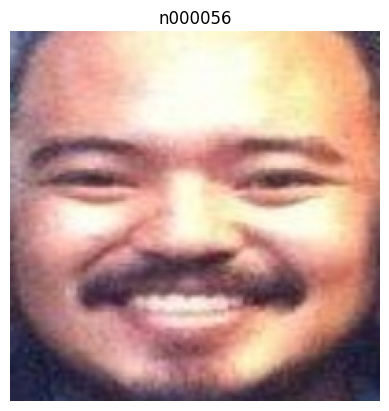

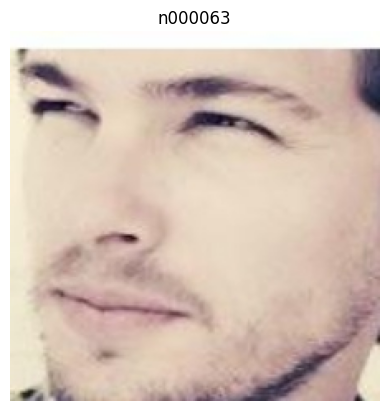

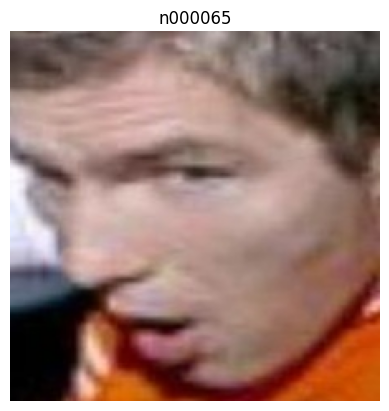

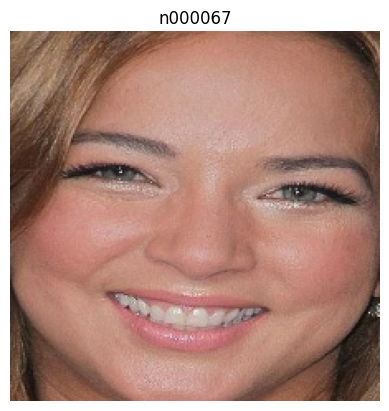

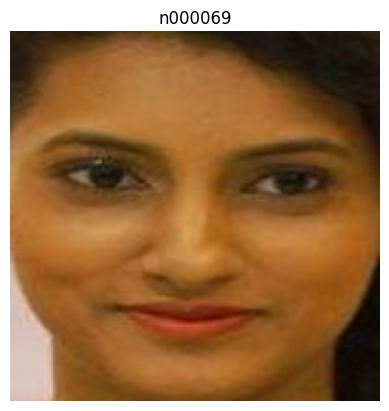

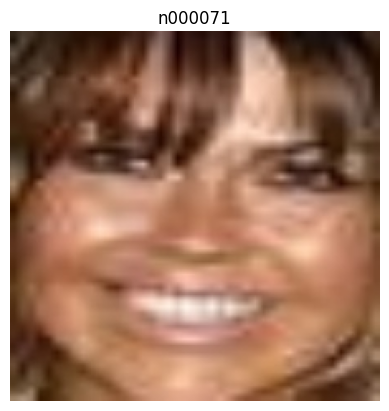

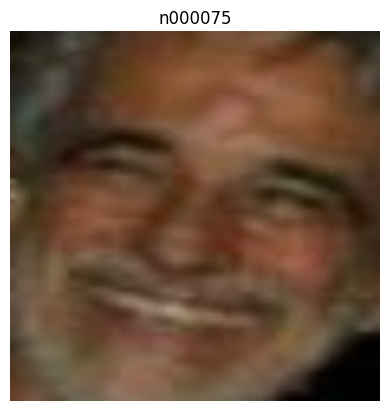

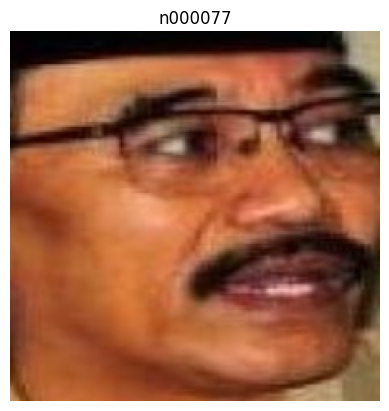

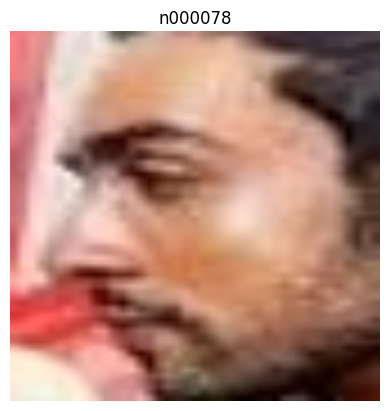

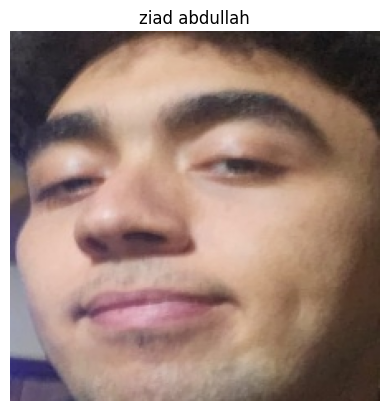

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

for person in valid_persons:
    images = list(person.glob("*"))
    if len(images) == 0:
        continue

    img_path = random.choice(images)

    img = Image.open(img_path)

    plt.imshow(img)
    plt.axis('off')
    plt.title(person.name)
    plt.show()


##SPLIT DATA EVERY CLASS(PERSON) SPLIT INTO (70% TRAIN & 20% TEST & 10% VALIDATION)

In [ ]:
random.seed(42)

for person in valid_persons:
    images = list(person.glob("*"))
    random.shuffle(images)

    n = len(images)
    n_train = int(0.7 * n)
    n_val   = int(0.1 * n)

    train_imgs = images[:n_train]
    val_imgs   = images[n_train:n_train+n_val]
    test_imgs  = images[n_train+n_val:]

    for split_dir, imgs in zip(
        [TRAIN_DIR, VAL_DIR, TEST_DIR],
        [train_imgs, val_imgs, test_imgs]
    ):
        dest = split_dir / person.name
        dest.mkdir(parents=True, exist_ok=True)

        for img in imgs:
            shutil.copy2(img, dest / img.name)

print("✅ Split 70/20/10 completed")


✅ Split 70/20/10 completed


##CHECK AFTER SPLIT

In [ ]:
print("Train classes:", len(list(TRAIN_DIR.iterdir())))
print("Val classes:", len(list(VAL_DIR.iterdir())))
print("Test classes:", len(list(TEST_DIR.iterdir())))

Train classes: 31
Val classes: 31
Test classes: 31


In [ ]:
def augment_image(img_path, save_path):
    img = Image.open(img_path).convert("RGB")

    if random.random() < 0.5:
        enhancer = ImageEnhance.Brightness(img)
        img = enhancer.enhance(random.uniform(0.7, 1.3))

    if random.random() < 0.5:
        enhancer = ImageEnhance.Contrast(img)
        img = enhancer.enhance(random.uniform(0.7, 1.3))

    if random.random() < 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)

    if random.random() < 0.5:
        angle = random.randint(-15, 15)
        img = img.rotate(angle)

    img.save(save_path)


##SKIP ZIAD FILE IN AUGUMENTATION

In [ ]:
AUG_PER_IMAGE = 2

train_classes = list(TRAIN_DIR.glob("*"))

for cls in train_classes:
    images = list(cls.glob("*"))

    for img_path in images:

        # ⛔ skip augmented images
        if "_aug" in img_path.name:
            continue

        for i in range(AUG_PER_IMAGE):
            new_name = img_path.stem + f"_aug{i}" + img_path.suffix
            save_path = cls / new_name
            augment_image(img_path, save_path)

print("✨ Augmentation done!")



✨ Augmentation done!


##CHECK ON RANDOM PERSON AFTER ALL IMAGE PREPROCESSING

In [ ]:
train_imgs = list((TRAIN_DIR / person_name).glob("*"))
val_imgs   = list((VAL_DIR / person_name).glob("*"))
test_imgs  = list((TEST_DIR / person_name).glob("*"))

print("Train images:", len(train_imgs))
print("Val images:", len(val_imgs))
print("Test images:", len(test_imgs))


Train images: 405
Val images: 19
Test images: 39


In [ ]:
person_name = next(TRAIN_DIR.iterdir()).name
print("Person:", person_name)


Person: n000001


In [ ]:
train_img = next((TRAIN_DIR / person_name).glob("*"))
val_img   = next((VAL_DIR   / person_name).glob("*"))
test_img  = next((TEST_DIR  / person_name).glob("*"))

imgs = [
    Image.open(train_img),
    Image.open(val_img),
    Image.open(test_img)
]
titles = ["Train", "Validation", "Test"]


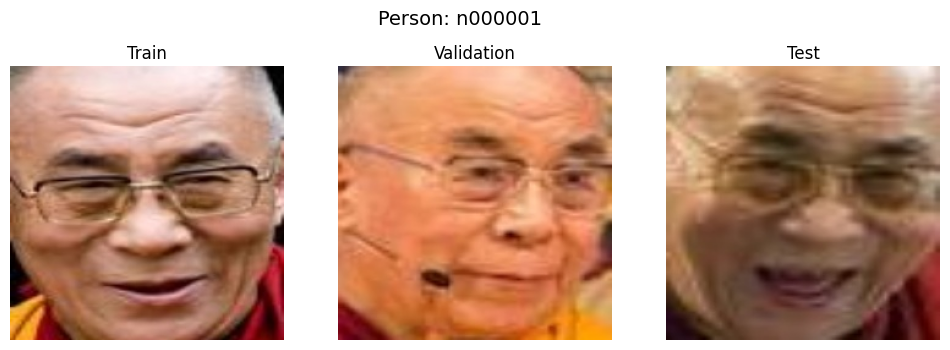

In [ ]:
plt.figure(figsize=(12,4))

for i, (img, title) in enumerate(zip(imgs, titles)):
    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")

plt.suptitle(f"Person: {person_name}", fontsize=14)
plt.show()


#model resnet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 12340 files belonging to 31 classes.
Found 583 files belonging to 31 classes.
Found 1218 files belonging to 31 classes.


In [ ]:
base_model = ResNet50(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False, weights='imagenet')
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(train_ds.class_names), activation="softmax")
])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [ ]:
EPOCHS = 10

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 71s 146ms/step - accuracy: 0.4092 - loss: 2.5831 - val_accuracy: 0.7719 - val_loss: 0.8963
Epoch 2/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.7562 - loss: 0.8449 - val_accuracy: 0.7753 - val_loss: 0.9988
Epoch 3/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.8230 - loss: 0.5765 - val_accuracy: 0.8045 - val_loss: 0.9846
Epoch 4/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.8665 - loss: 0.4399 - val_accuracy: 0.7873 - val_loss: 1.0454
Epoch 5/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.8811 - loss: 0.3886 - val_accuracy: 0.7976 - val_loss: 1.0589
Epoch 6/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 44s 115ms/step - accuracy: 0.8912 - loss: 0.3507 - val_accuracy: 0.7822 - val_loss: 1.0776
Epoch 7/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 44s 113ms/step - accuracy: 0.9040 - loss: 0.3121 - val_accuracy: 0.7993 - val_loss: 1.1021
Epoch 8/10
386/386 ━━━━━━━━━━━━━━━━━━━━ 43s 112ms/step - accuracy: 0.9144 - loss: 0

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy:", test_acc)


39/39 ━━━━━━━━━━━━━━━━━━━━ 7s 167ms/step - accuracy: 0.8026 - loss: 1.0925
Test accuracy: 0.7996715903282166


In [ ]:
model.save("resnet50_face_model.h5")
